In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

In [15]:
df_flame = pd.read_csv("flame.txt", sep="\t")
df_jain = pd.read_csv("jain.txt", sep="\t")

In [16]:
column_names = ["x", "y", "type"]

df_flame.columns = column_names
df_jain.columns = column_names

In [17]:
df_flame.info

<bound method DataFrame.info of         x      y  type
0    1.35  26.65     1
1    1.40  23.25     2
2    0.85  23.05     2
3    0.50  22.35     2
4    0.65  21.35     2
..    ...    ...   ...
234  7.50  26.20     1
235  7.50  25.65     1
236  7.05  25.85     1
237  6.90  27.15     1
238  6.15  26.90     1

[239 rows x 3 columns]>

In [18]:
df_jain.info

<bound method DataFrame.info of          x      y  type
0     0.75  15.60     2
1     3.30  15.45     2
2     5.25  14.20     2
3     4.90  15.65     2
4     5.35  15.85     2
..     ...    ...   ...
367  38.75  16.85     1
368  39.00  16.60     1
369  38.25  17.35     1
370  39.50  16.95     1
371  39.90  17.05     1

[372 rows x 3 columns]>

In [19]:
datasets = [df_flame, df_jain]

In [20]:
def natural_scalar_product(X, Y):
    res = [[] for _ in range(len(X))]

    for i, x in enumerate(X):
      for y in Y:
        res[i].append(x[0] * y[0])

    return res

In [21]:
def step(X, Y):
  res = [[] for _ in range(len(X))]
  step = 1

  for i, x in enumerate(X):
    for y in Y:
      if np.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2) <= step: res[i].append(1)
      else: res[i].append(0)

  return res


In [22]:
def hinge(X, Y):
  res = [[] for _ in range(len(X))]
  r = 1

  for i, x in enumerate(X):
    for y in Y:
      val = np.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2)
      if val <= r: res[i].append(1 - val / r)
      else: res[i].append(0)

  return res

In [23]:
classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(kernel=natural_scalar_product, C=0.025),
    SVC(kernel="rbf", C=0.025),
    SVC(kernel=step, C=0.025),
    SVC(kernel=hinge, C=0.025),
    ]

In [24]:
def get_margin(clf):
  clf = clf.get_params()['svc']
  w = clf.coef_[0]
  a = -w[0] / w[1]
  xx = np.linspace(-5, 5)
  yy = a * xx - (clf.intercept_[0]) / w[1]

  margin = 1 / np.sqrt(np.sum(clf.coef_**2))
  yy_down = yy - np.sqrt(1 + a**2) * margin
  yy_up = yy + np.sqrt(1 + a**2) * margin

  return margin

support:  [  6  10  11  18  20  23  26  27  31  32  33  42  45  46  53  67  70  73
  77  78  84  92  93  94  96 100 104 105 110 113 115 117 118 124 126 127
 128 129 135 136 137 138 139 142 143 153 155 160 165   0   1   4   7  12
  14  15  16  19  22  29  34  36  38  40  41  49  51  52  55  56  58  59
  60  61  65  66  75  76  86  87  88  91  98  99 107 108 111 112 116 133
 140 144 146 147 148 157 159 163]
score:  0.9166666666666666
margin:  1.0459208624021323
support:  [  6  10  11  18  20  23  26  27  31  32  33  35  42  45  46  53  54  57
  63  67  68  70  73  77  78  81  84  92  93  94  96 100 104 105 110 113
 115 117 118 123 124 125 126 127 128 129 135 136 137 138 139 142 143 153
 155 156 158 160 165   0   2   3   5   8   9  15  17  21  24  28  29  37
  38  39  40  43  44  47  48  50  52  55  58  62  64  69  71  72  79  82
  83  85  87  90  95  97 102 103 106 109 114 119 120 121 122 130 131 132
 134 145 146 148 149 150 152 154 161 164 166]
score:  0.625
support:  [  6  10  11  18  

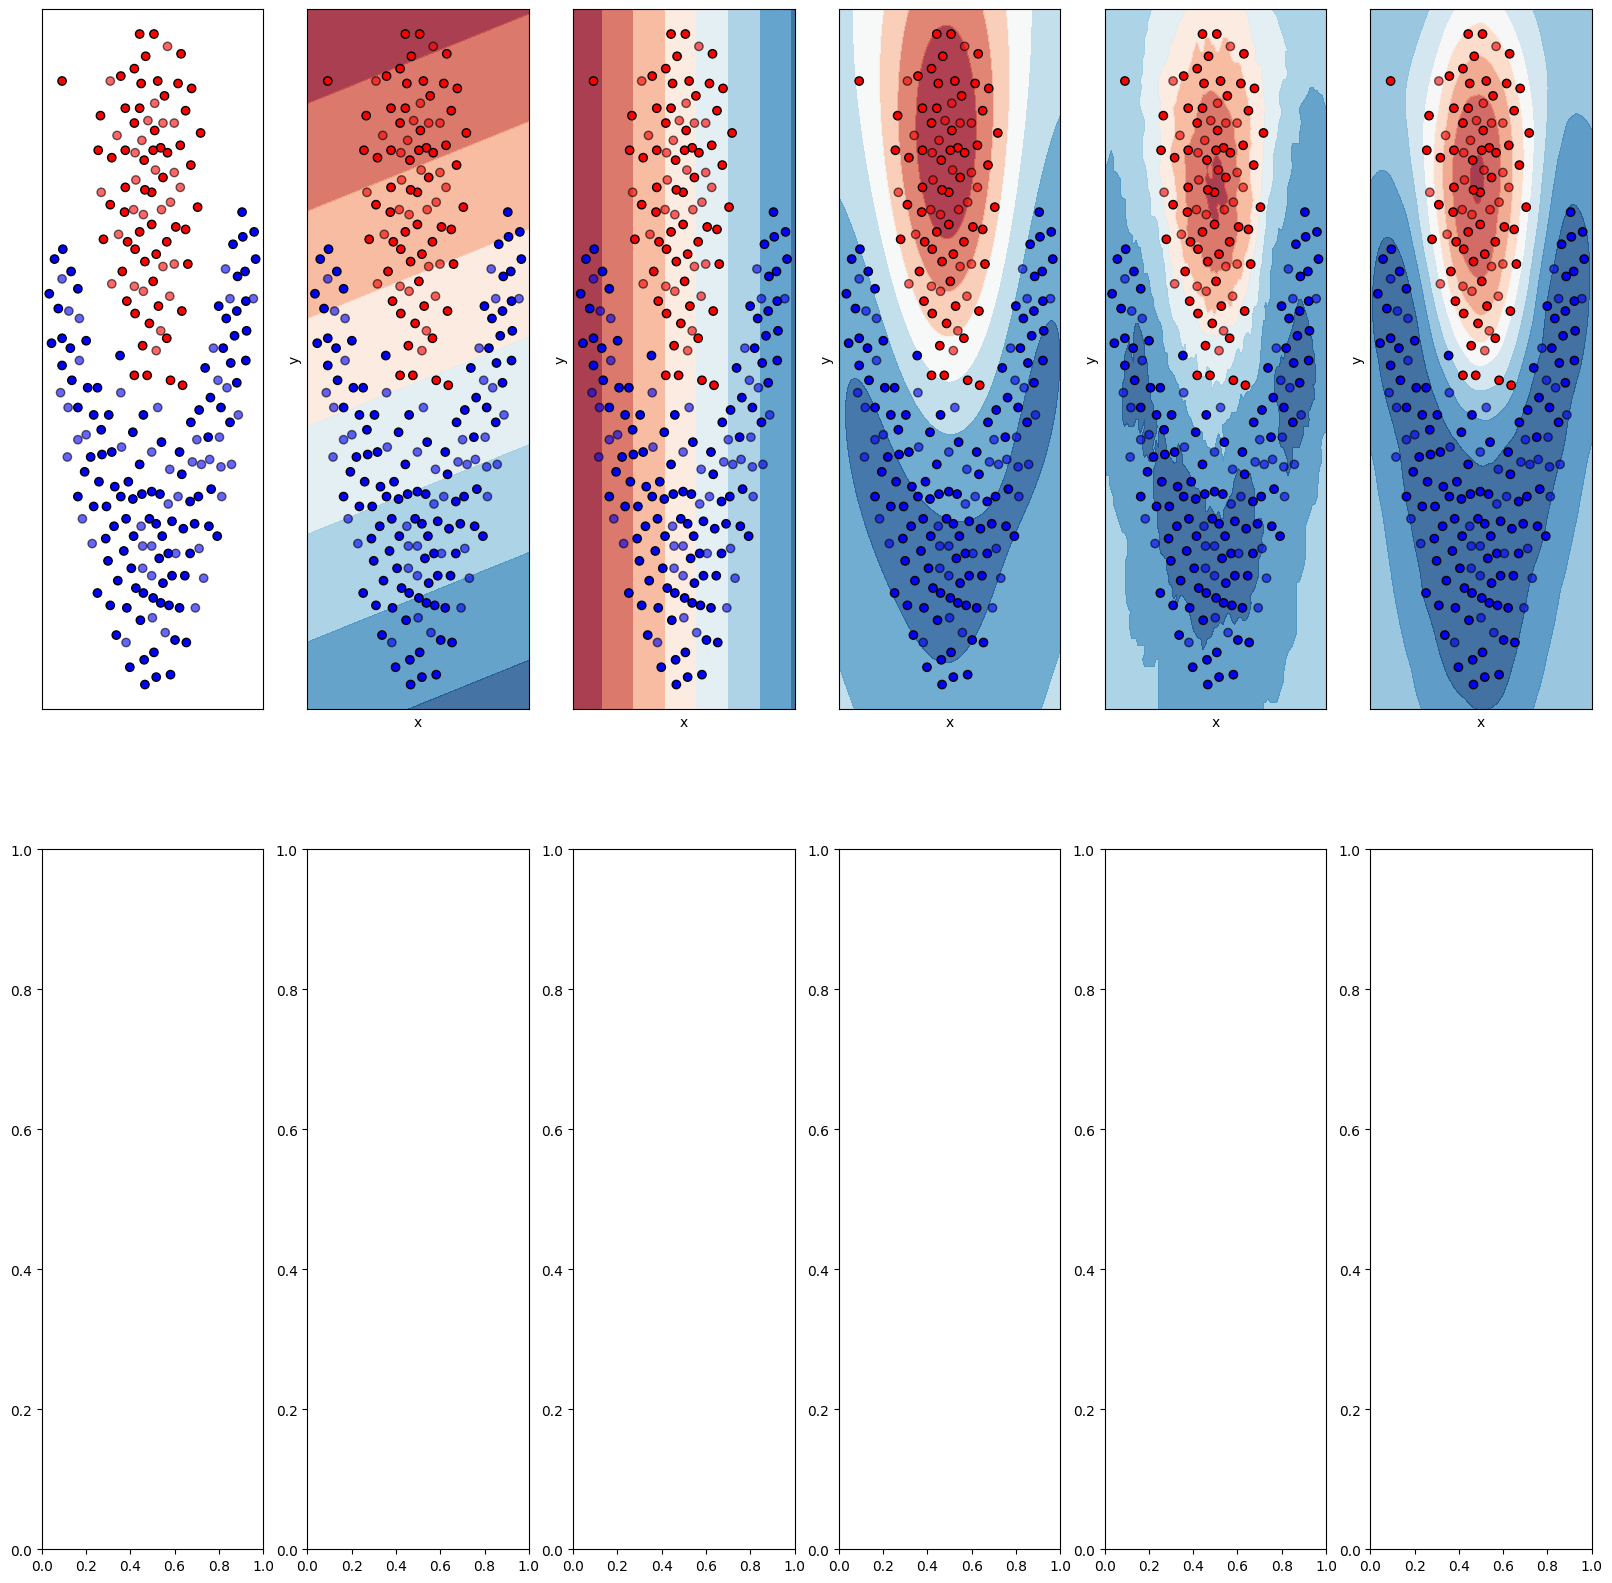

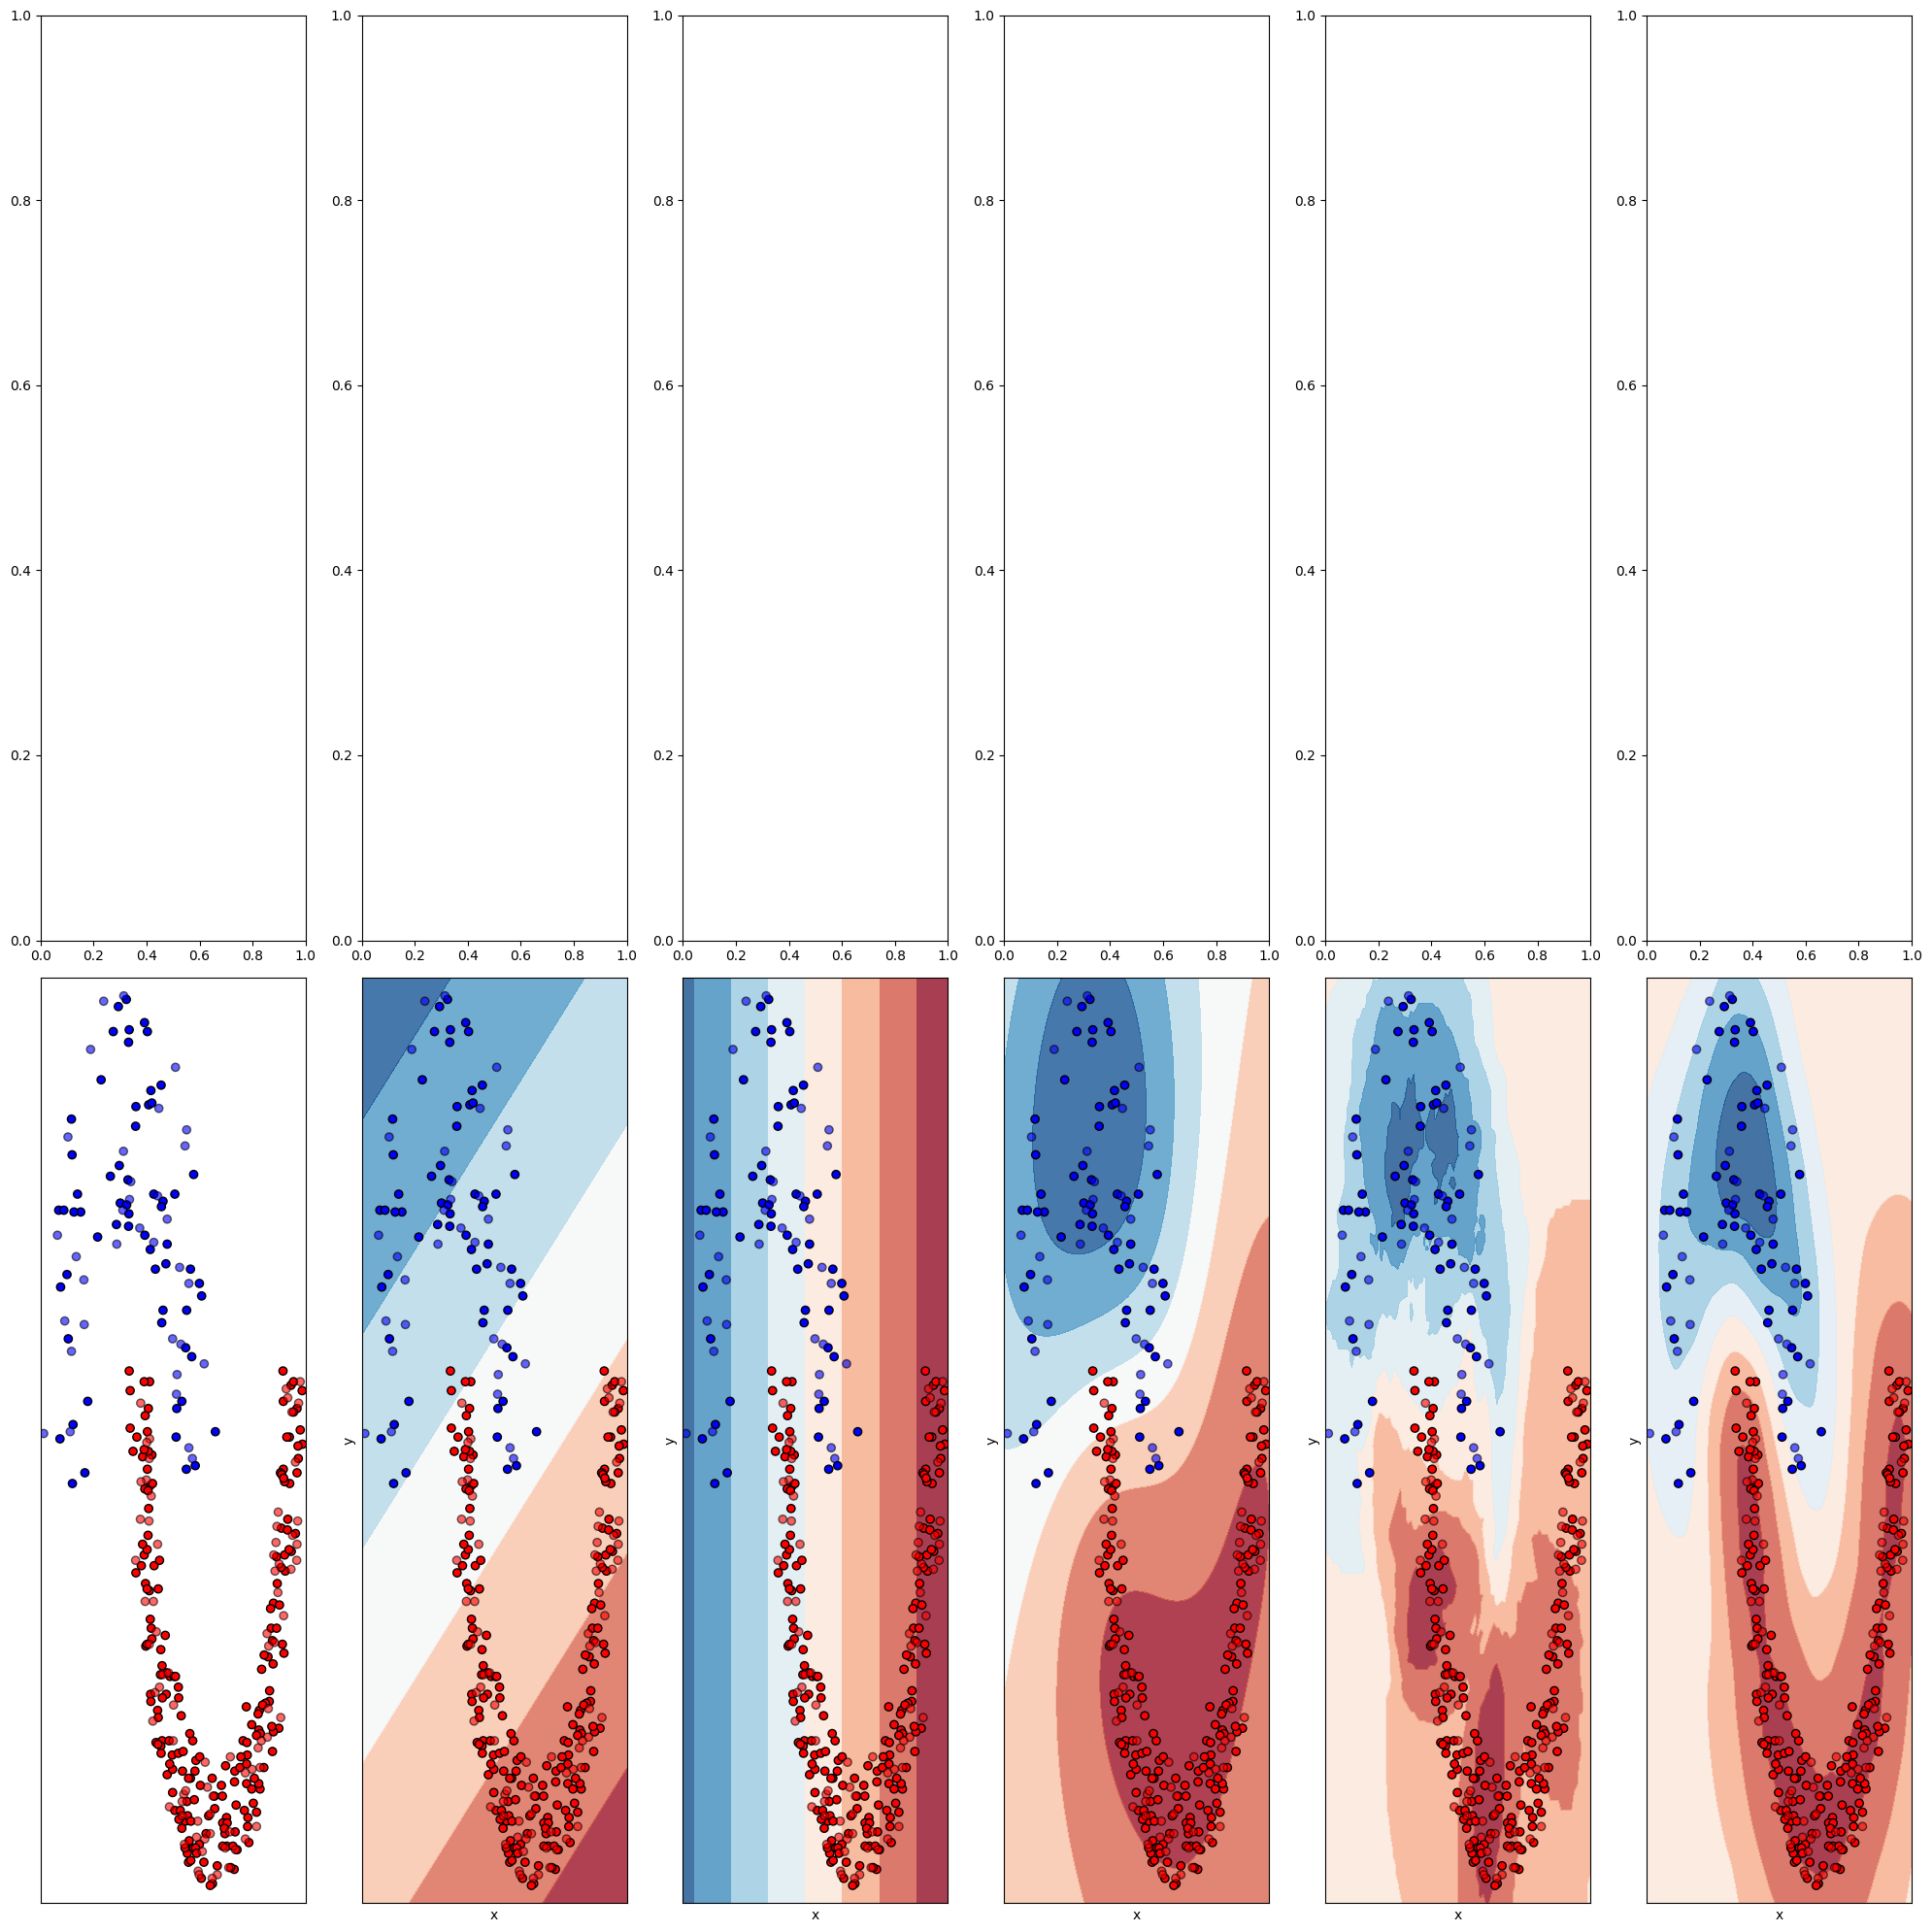

In [25]:
i = 0
for df in datasets:
  j = 0

  X, y = df.iloc[:, 0:-1], df.iloc[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  x_min, x_max = X['x'].min() - 0.5, X['x'].max() + 0.5
  y_min, y_max = X['y'].min() - 0.5, X['y'].max() + 0.5

  cm = plt.cm.RdBu
  cm_bright = ListedColormap(["#FF0000", "#0000FF"])
  fig, ax = plt.subplots(len(datasets), len(classifiers)+1, figsize=(20,20))

  ax[i, j].scatter(X_train['x'], X_train['y'], c=y_train, cmap=cm_bright, edgecolors="k")  
  ax[i, j].scatter(X_test['x'], X_test['y'], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
  
  ax[i, j].set_xlim(x_min, x_max)
  ax[i, j].set_ylim(y_min, y_max)
  ax[i, j].set_xticks(())
  ax[i, j].set_yticks(())

  j += 1

  for clf in classifiers:
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cm, alpha=0.8, ax=ax[i, j], eps=0.5)

    support = clf.get_params()['svc'].support_
    print("support: ", support)

    score = clf.score(X_test, y_test)
    print("score: ", score)

    if j == 1:
      print("margin: ", get_margin(clf))

    ax[i, j].scatter(X_train['x'], X_train['y'], c=y_train, cmap=cm_bright, edgecolors="k")
    ax[i, j].scatter(X_test['x'], X_test['y'], c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6)

    ax[i, j].set_xlim(x_min, x_max)
    ax[i, j].set_ylim(y_min, y_max)
    ax[i, j].set_xticks(())
    ax[i, j].set_yticks(())

    j += 1

  i += 1

plt.tight_layout()
plt.show()

support:  [  6  10  11  18  20  23  26  27  31  32  33  35  42  45  46  53  54  57
  63  67  68  70  73  77  78  81  84  92  93  94  96 100 104 105 110 113
 115 117 118 123 124 125 126 127 128 129 135 136 137 138 139 142 143 153
 155 156 158 160 165   0   1   4   7  12  14  15  16  19  22  29  30  34
  36  38  40  41  48  49  50  51  52  55  56  58  59  60  61  62  65  66
  72  75  76  82  85  86  87  88  91  98  99 107 108 111 112 116 133 140
 144 146 147 148 149 151 157 159 163 166]
score:  0.625
margin:  16.052817868942356
support:  [  6  10  11  18  20  23  26  27  31  32  33  35  42  45  46  53  54  57
  63  67  68  70  73  77  78  81  84  92  93  94  96 100 104 105 110 113
 115 117 118 123 124 125 126 127 128 129 135 136 137 138 139 142 143 153
 155 156 158 160 165   0   1   4   7  12  14  15  16  19  22  29  30  34
  36  38  40  41  48  49  51  52  55  56  58  59  60  61  62  64  65  66
  72  75  76  82  85  86  87  88  91  98  99 107 108 111 112 116 133 140
 144 146 147 148 149

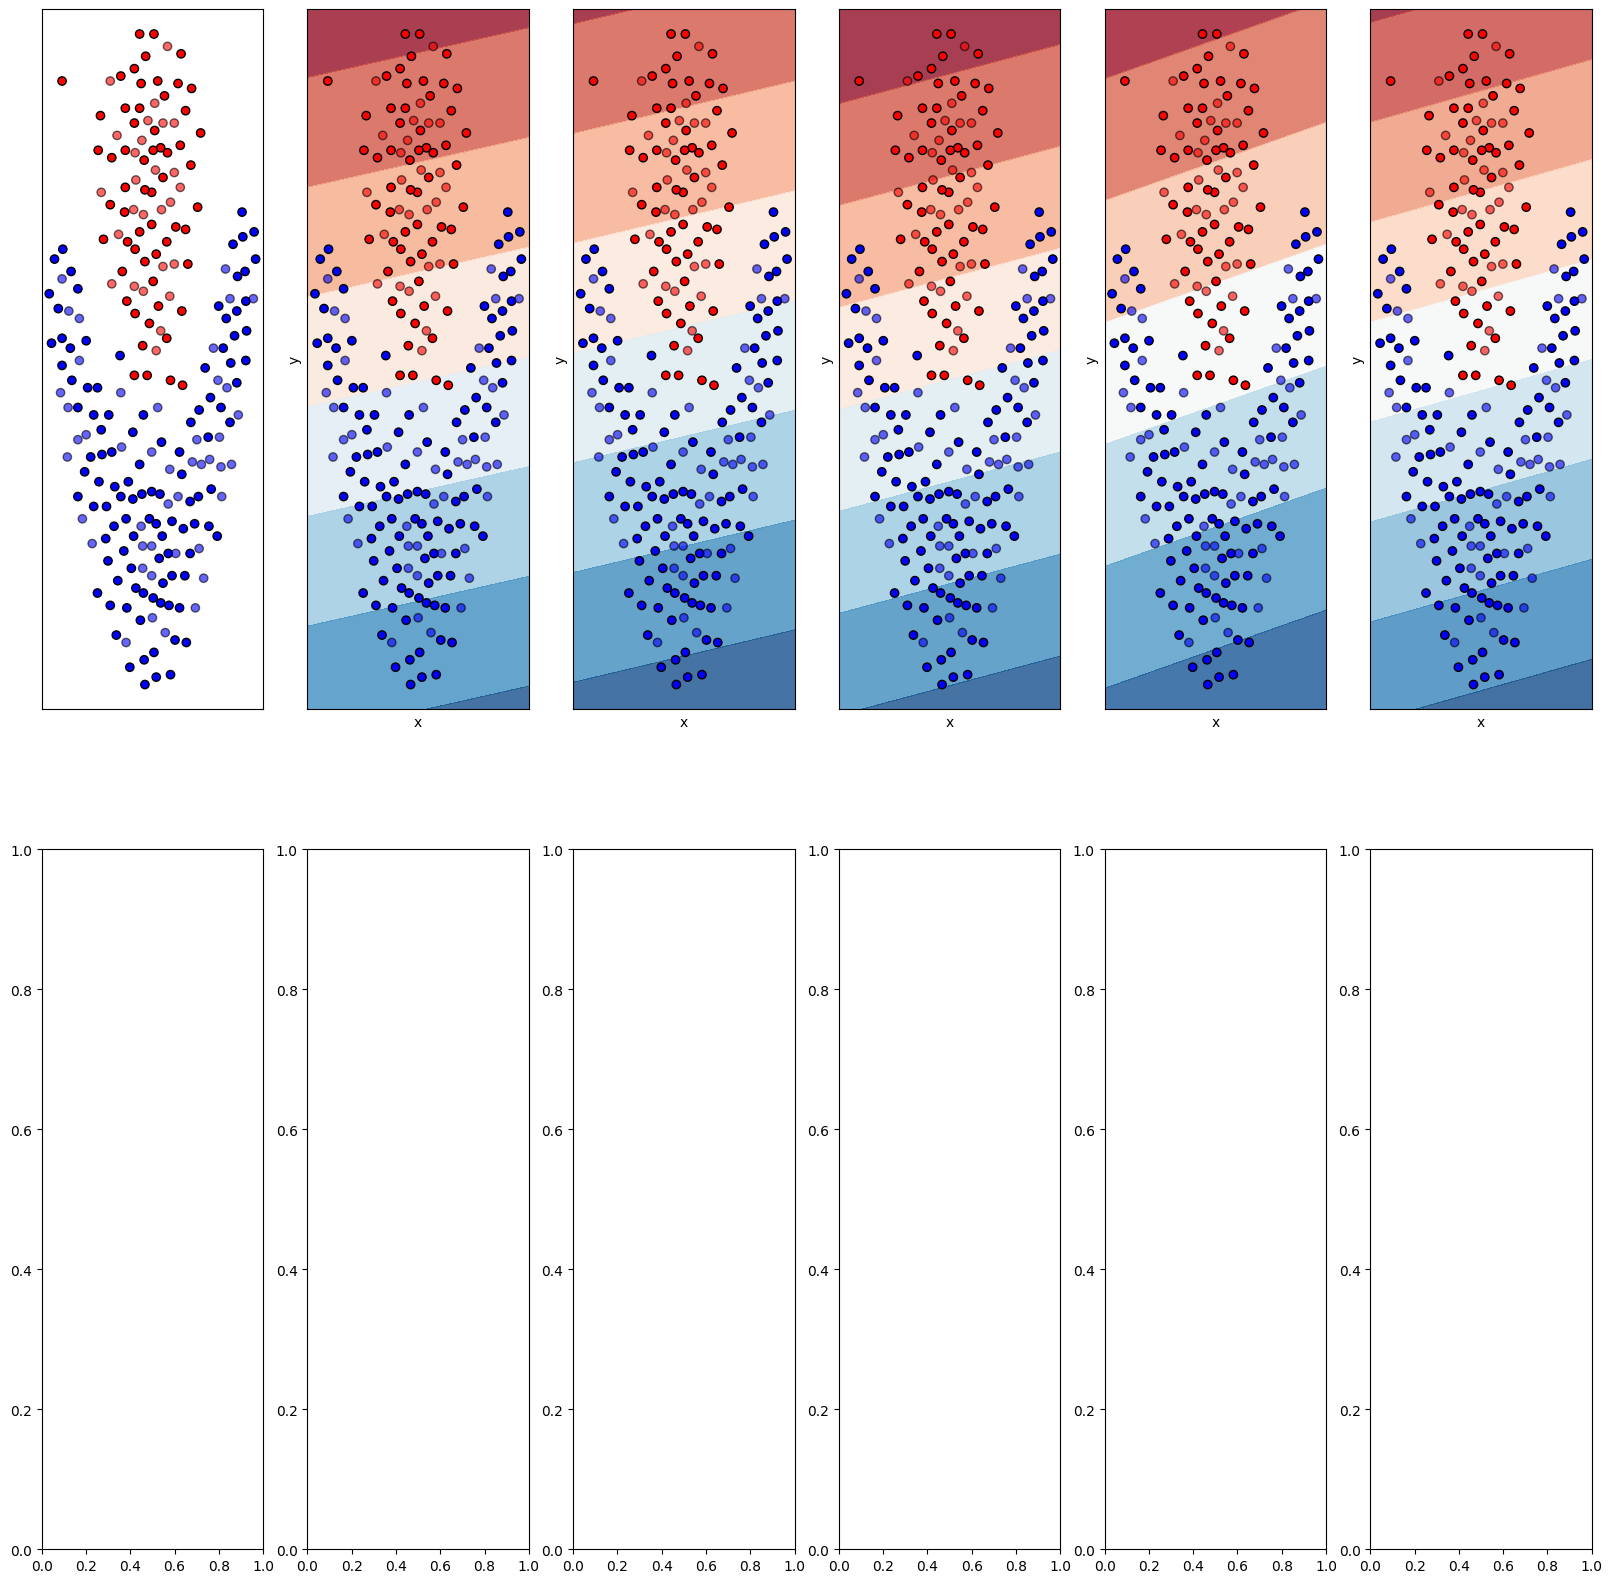

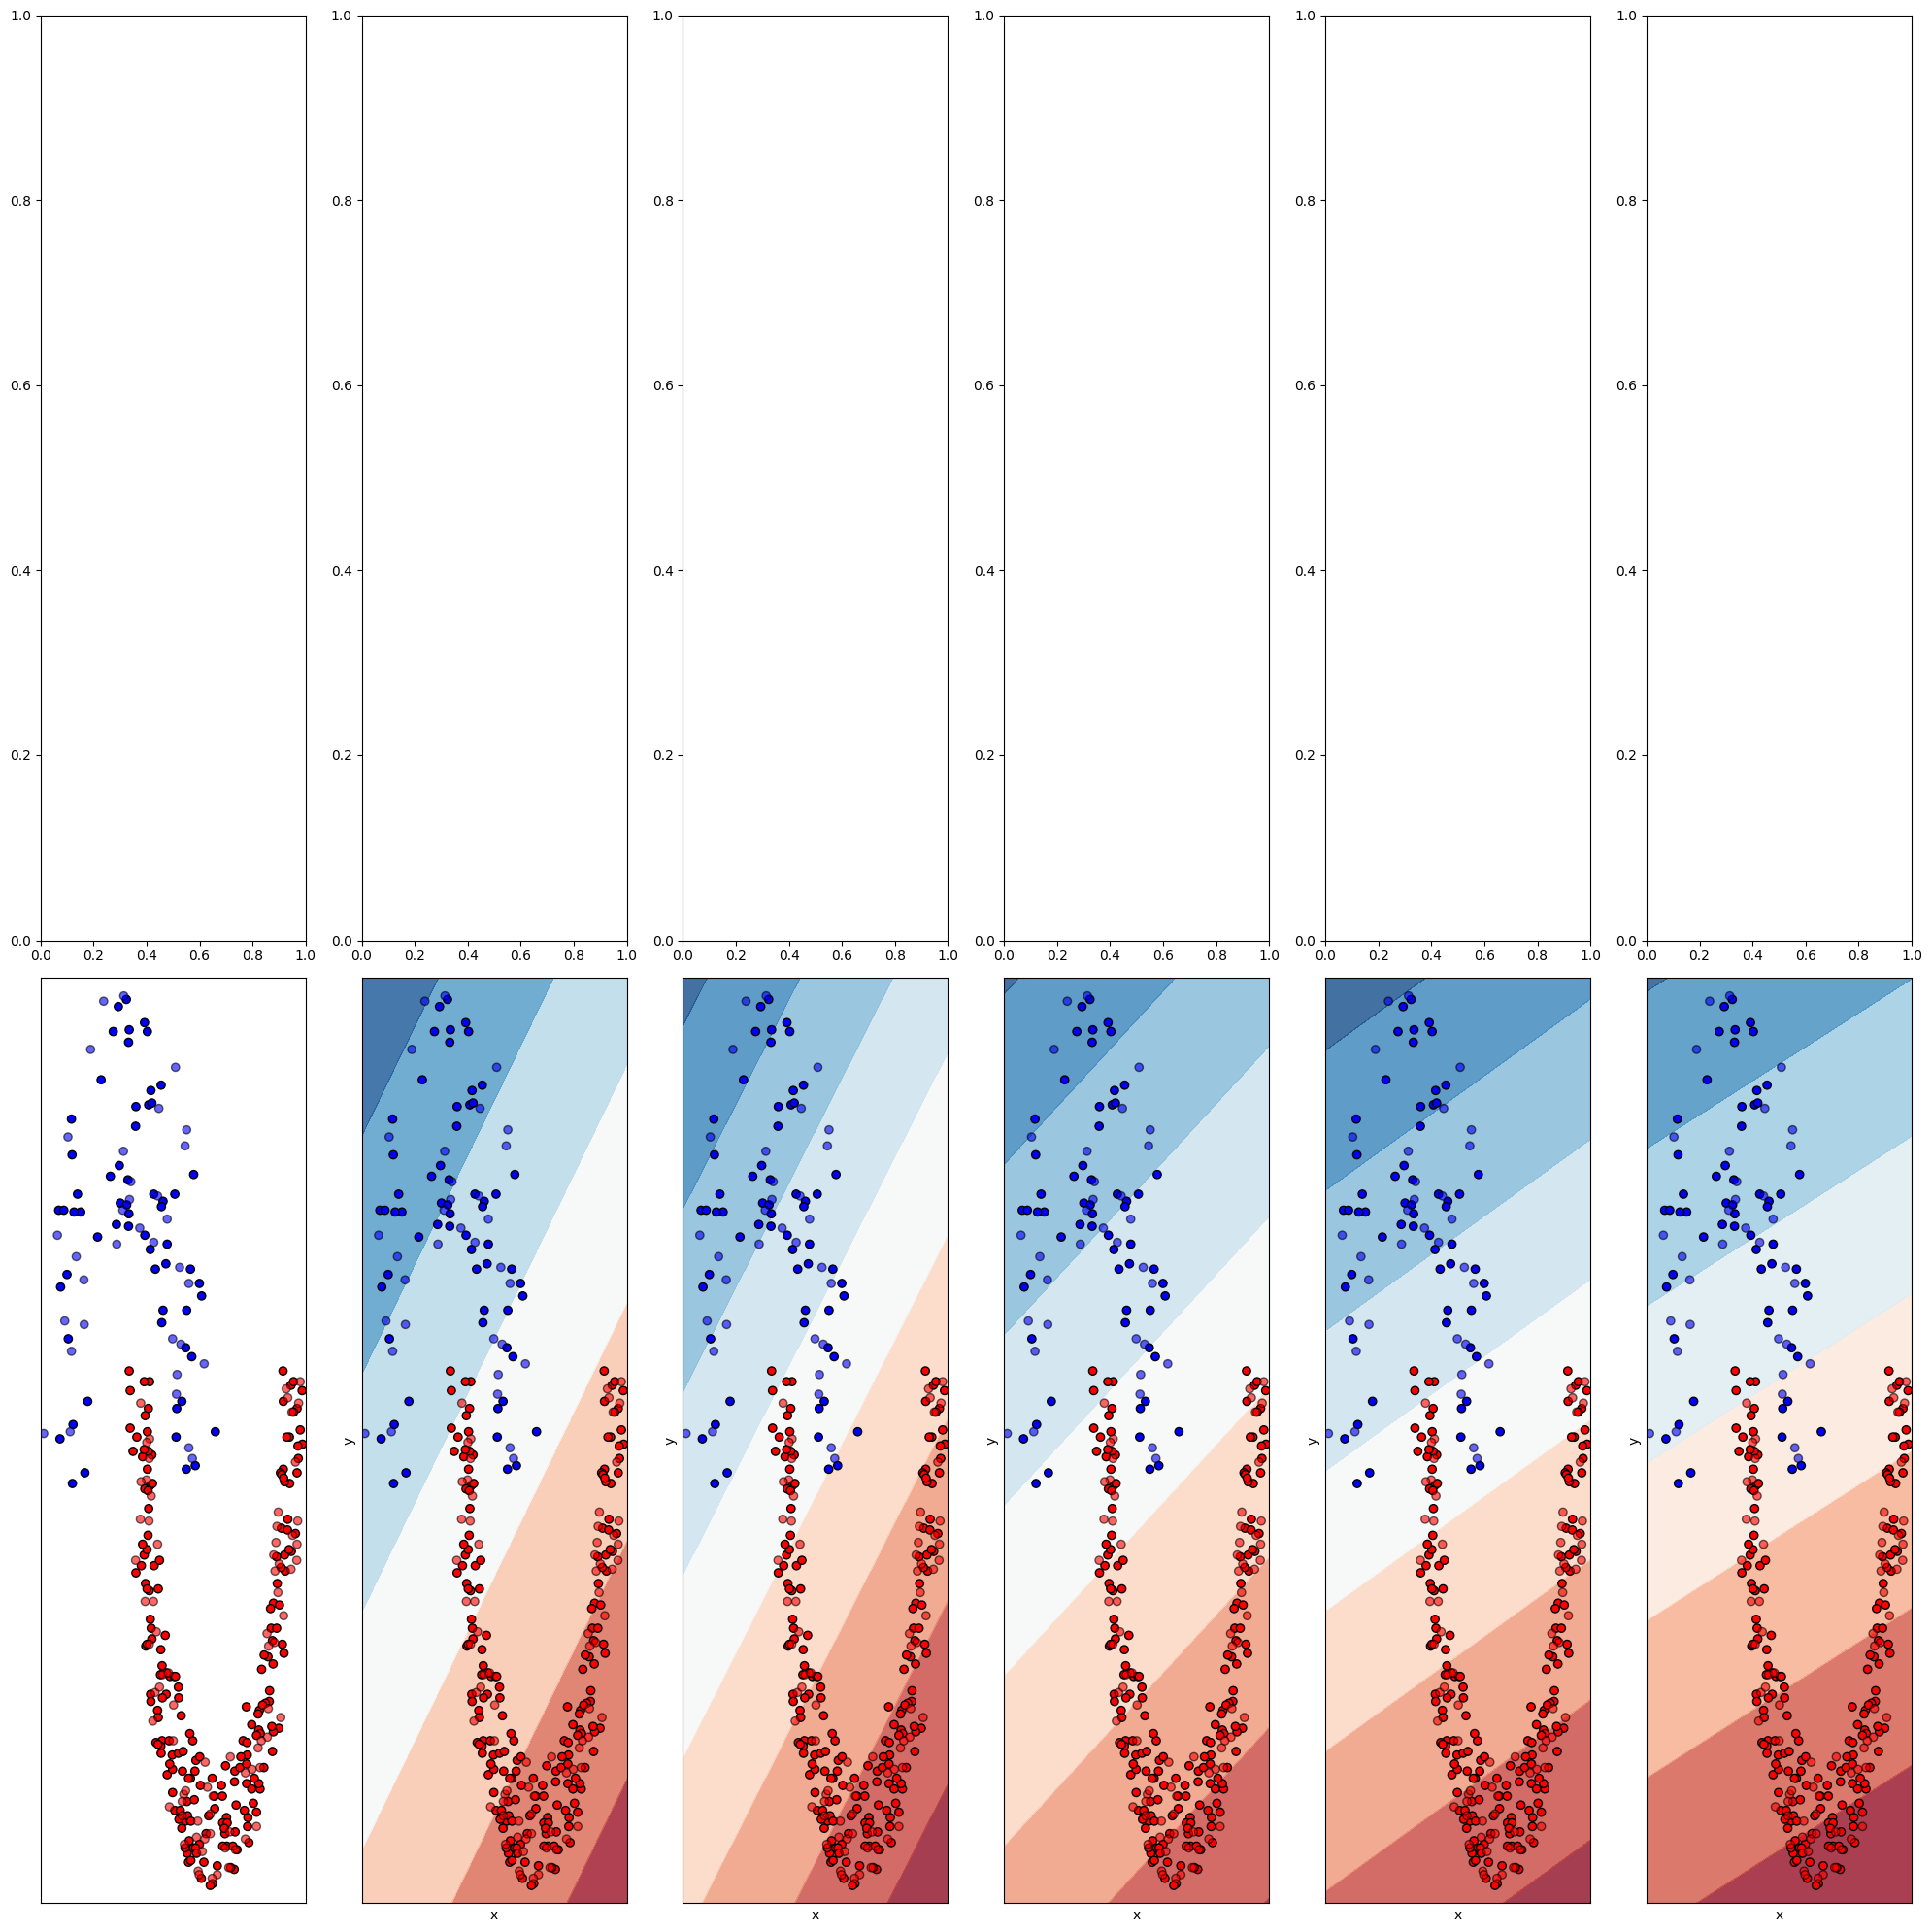

In [26]:
k = 5

i = 0
for df in datasets:
  j = 0

  X, y = df.iloc[:, 0:-1], df.iloc[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  x_min, x_max = X['x'].min() - 0.5, X['x'].max() + 0.5
  y_min, y_max = X['y'].min() - 0.5, X['y'].max() + 0.5

  cm = plt.cm.RdBu
  cm_bright = ListedColormap(["#FF0000", "#0000FF"])
  fig, ax = plt.subplots(len(datasets), k+1, figsize=(20,20))

  ax[i, j].scatter(X_train['x'], X_train['y'], c=y_train, cmap=cm_bright, edgecolors="k")  
  ax[i, j].scatter(X_test['x'], X_test['y'], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
  
  ax[i, j].set_xlim(x_min, x_max)
  ax[i, j].set_ylim(y_min, y_max)
  ax[i, j].set_xticks(())
  ax[i, j].set_yticks(())

  j += 1

  T = [
      SVC(kernel="linear", C=0.001*(10**(i))) for i in range(k)
  ]
  for clf in T:
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cm, alpha=0.8, ax=ax[i, j], eps=0.5)

    support = clf.get_params()['svc'].support_
    print("support: ", support)

    score = clf.score(X_test, y_test)
    print("score: ", score)

    if j == 1:
      print("margin: ", get_margin(clf))

    ax[i, j].scatter(X_train['x'], X_train['y'], c=y_train, cmap=cm_bright, edgecolors="k")
    ax[i, j].scatter(X_test['x'], X_test['y'], c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6)

    ax[i, j].set_xlim(x_min, x_max)
    ax[i, j].set_ylim(y_min, y_max)
    ax[i, j].set_xticks(())
    ax[i, j].set_yticks(())

    j += 1

  i += 1

plt.tight_layout()
plt.show()